In [5]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [6]:
plt.rcParams.update({'font.size': 22})
# Set rcParams for matplotlib so all plots have opaque background
plt.rcParams['figure.facecolor'] = 'white'

# Checking Progress of FAH Project

This notebook uses API calls to pull down project data about how much data a FAH project\
has collected so far. With this you can check for the progress of projects. 

## Define key variables

Also define paths to your license and key files.

In [15]:
project_number = 17637
num_ns_per_wu = 10 # 10 ns per work unit - this could change depending on the project
license_path = "/home/sukrit/licenses/fah-cert-sukritsingh.pem"
key_path = "/home/sukrit/licenses/private-fah-sukritsingh.pem"
work_server_url = "https://pllwskifah2.mskcc.org" #Ensure the WS URL is correct for your project

Now use requests and json to pull down the JSON file returned by the API

In [16]:
# use requests to get the project data
r = requests.get("%s/api/projects/%s" % (work_server_url, project_number), 
                 cert=(license_path, key_path))
project_data = r.json()

In [17]:
# assert that len(project_data) = 20 to ensure a correct response was received from the WS
try: 
    assert len(project_data) == 20
    print("Project data received successfully")
except AssertionError as e:
    print("Error: %s" % e)
    print("Ensure the WS URL is correct for your project")
    print("Ensure the license and key paths are correct")
    print("Ensure the project number is correct")

Project data received successfully


## Process Database

In [26]:
wu_hist = np.asarray(project_data['histogram'])
wu_gens = int(project_data['gens']) # the max number of possible generations being histogrammed
wu_total = int(project_data['gens_completed'])
print("Number of max possible gens: %s" % wu_gens)
print("Total dataset so far: %s nanoseconds" % (wu_total*num_ns_per_wu))

Number of max possible gens: 1000
Total dataset so far: 149320 nanoseconds


In [19]:
# Condense the histogram to stop at the last generation with work units
# find where the last work unit was generated
trunc_ind = np.where(wu_hist > 0)[0][-1] # trunc_ind indicates the bin that contains the longest trajectory
wu_hist_trunc = wu_hist[:trunc_ind+1] # truncate the histogram to only include the bins with work units

# Convert trunc_ind also to the max possible generation run
trunc_gen = (trunc_ind*wu_gens)/1000 # we divide by number of buckets
gen_vals = np.linspace(0, int(trunc_gen)+1, num=trunc_ind+1)

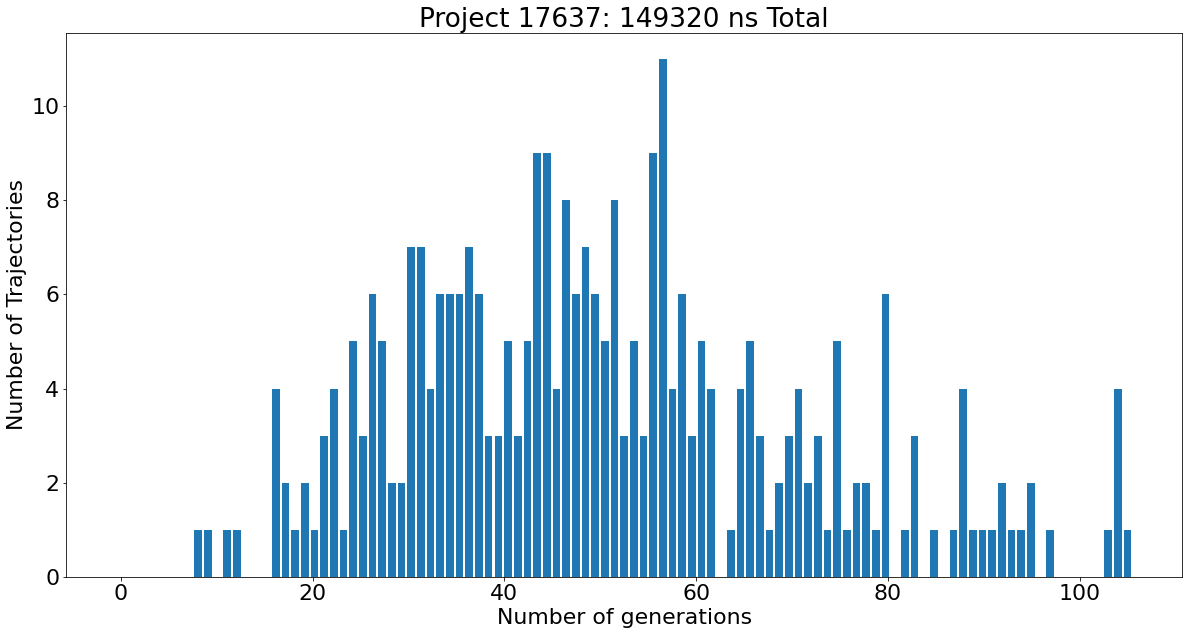

In [20]:
# Plot the histogram
ax = plt.figure(figsize=(20,10))
plt.bar(gen_vals, wu_hist_trunc)    
plt.xlabel("Number of generations")
plt.ylabel("Number of Trajectories")
plt.title("Project %s: %s ns Total" % (project_number, wu_total*num_ns_per_wu))
plt.show()


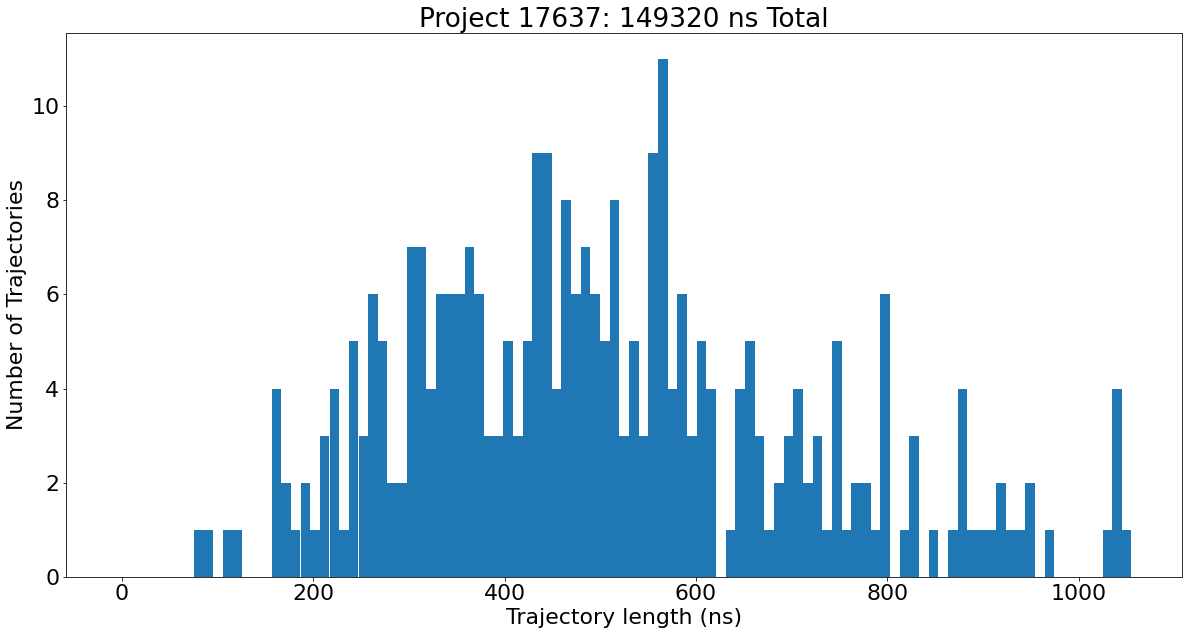

In [23]:
# Plot the histogram but for trajectory length
plt.figure(figsize=(20,10))
plt.bar(gen_vals*num_ns_per_wu,wu_hist_trunc, width=num_ns_per_wu)
plt.xlabel("Trajectory length (ns)")
plt.ylabel("Number of Trajectories")
plt.title("Project %s: %s ns Total" % (project_number, wu_total*num_ns_per_wu))
plt.savefig("/home/sukrit/downloads/progress-17637.png", dpi=300)
plt.show()

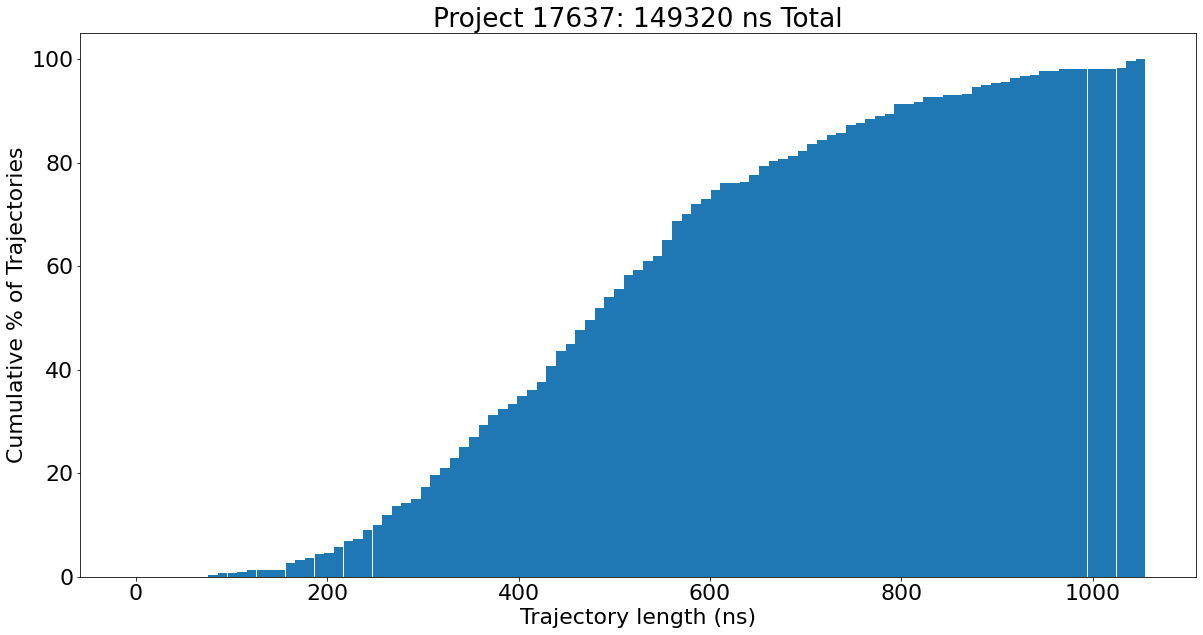

In [22]:
# Plot the cumulative histogram along trajectory length
plt.figure(figsize=(20,10))

# Get the cumulative histogram
cum_hist = np.cumsum(wu_hist_trunc)/np.sum(wu_hist_trunc)
plt.bar(gen_vals*num_ns_per_wu,cum_hist*100, width=num_ns_per_wu)
plt.xlabel("Trajectory length (ns)")
plt.ylabel("Cumulative % of Trajectories")
plt.title("Project %s: %s ns Total" % (project_number, wu_total*num_ns_per_wu))
plt.show()